In [3]:
import pymysql

try:
    conn = pymysql.connect(
        host='127.0.0.1',
        user='root',
        password='1234',
        database='sprint4'
    )
    print("✅ Conexión establecida con PyMySQL")
except Exception as e:
    print("❌ Error:", e)


✅ Conexión establecida con PyMySQL


Connecta Python amb MySQL Workbench i carrega les dades de la teva base de dades del Sprint 4 per utilitzar-les en tots els exercicis.

In [4]:
import pandas as pd

query= "SHOW TABLES"

df=pd.read_sql(query,conn)

df



C:\Users\GPSantana\AppData\Local\Temp\ipykernel_21868\1210987433.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(query,conn)


,Tables_in_sprint4
0,clientes
1,clientes_con_edad
2,companies
3,credit_cards
4,products
5,tarjetas_activas
6,transactions
7,transitionproduct


1. Connecta Python amb MySQL Workbench i carrega les dades de la teva base de dades del Sprint 4 per utilitzar-les en tots els exercicis.

In [49]:
tablas = ["clientes","companies","credit_cards","products","tarjetas_activas","transactions","transitionproduct"]

dfs ={}

for tabla in tablas:
    querry =f"SELECT * FROM {tabla}"
    df=pd.read_sql(querry,conn)
    dfs[tabla]=df



dfs["transactions"].head()



C:\Users\GPSantana\AppData\Local\Temp\ipykernel_21868\2167742543.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql(querry,conn)


,id,card_id,business_id,timestamp,amount,declined,product_ids,user_id,lat,longitude
0,00043A49-2949-494B-A5DD-A5BAE3BB19DD,CcS-9294,b-2458,2024-08-28 07:16:46,395.43,0,"16, 26, 97, 87",4713,46.1999,1.43554
1,000447FE-B650-4DCF-85DE-C7ED0EE1CAAD,CcS-5019,b-2370,2016-12-21 20:07:18,155.63,0,"66, 69, 87",438,41.5972,12.22180
2,00045D6B-ED2E-4F2F-8186-CEE074D875D0,CcS-6699,b-2390,2020-07-14 15:37:45,326.01,0,"30, 11, 16, 81",2118,29.7573,-95.37960
3,000481C3-1C26-4FEF-83A0-4CD0EB004BBD,CcS-6696,b-2230,2017-09-04 19:44:53,161.60,0,72,2115,53.5489,-113.50300
4,00051AA4-9CBE-4268-B070-C38062A1B3E2,CcS-7606,b-2266,2017-01-05 18:19:25,148.91,0,18,3025,52.2084,5.69081


2. Per a cada ítem, crea una visualització adequada segons les variables especificades. Interpreta els resultats segons les teves dades.

Una variable numèrica.

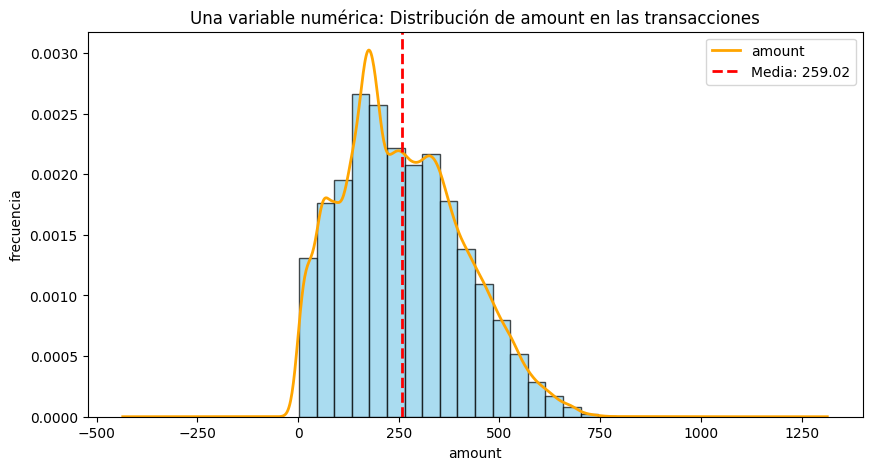

In [81]:
 
import matplotlib.pyplot as plt

dfs["transactions"]

media=dfs["transactions"]["amount"].mean()

plt.figure(figsize=(10, 5))

plt.hist(dfs["transactions"]["amount"], bins=20, color="skyblue", edgecolor="black", density=True, alpha=0.7)
dfs["transactions"]["amount"].plot(kind="kde", color="orange", linewidth=2)
plt.axvline(media, color="red", linestyle="--", linewidth=2, label=f"Media: {media:.2f}")

plt.title("Una variable numérica: Distribución de amount en las transacciones")
plt.xlabel("amount")
plt.ylabel("frecuencia")
plt.legend()
plt.show()


En éste gráfico observamos la distribución del monto de las transacciones, teniendo una media de 259€ y unos valores máximos sobre los 140€

Dues variables numèriques.

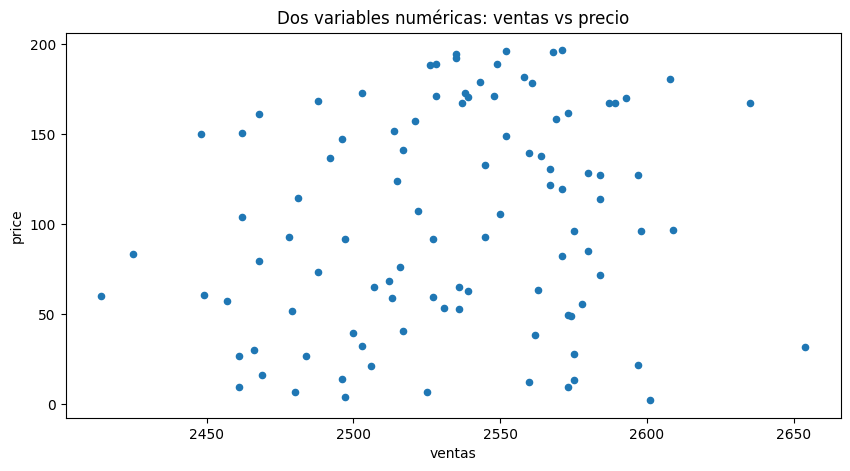

In [228]:
dfp=dfs["products"]
dftp=dfs["transitionproduct"]

df1= pd.merge(dfp, dftp, left_on="id", right_on="product_id", how="right")


df1= (
    df1.groupby(["product_id", "price"])
       .size()
       .reset_index(name="ventas")
)

df1["price"] = df1["price"].replace("[$]", "", regex=True)
df1["price"]= pd.to_numeric(df1["price"])

df1.plot(kind="scatter", x="ventas", y="price",figsize=(10,5))
plt.locator_params(axis='y', nbins=6)
plt.title("Dos variables numéricas: ventas vs precio")
plt.show()


En éste gráfico de scatterplot buscamos una relación entre el precio del producto y la cantidad de transacciones y  observamos que no hay una relación estrecha entre ambas variables ya que los puntos están muy dispersos sin describir una linea clara.

Una variable categòrica

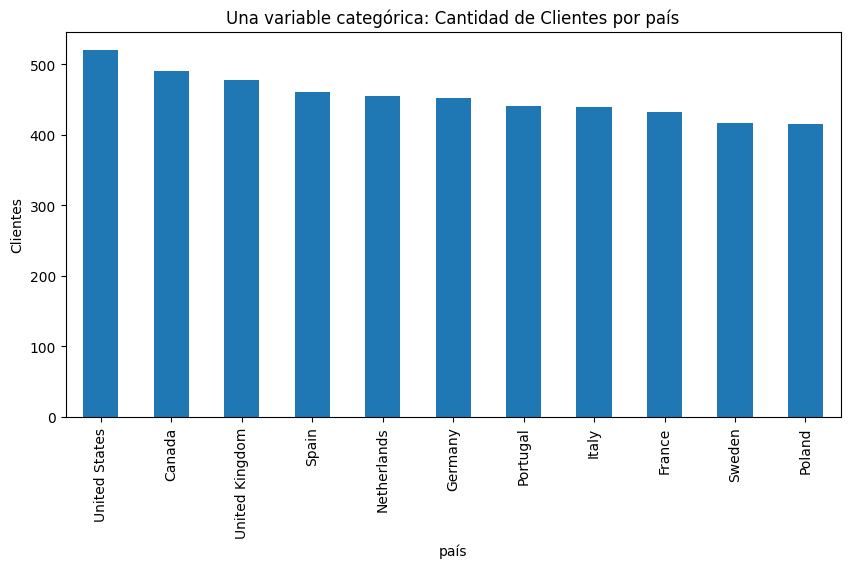

In [234]:
df2=dfs["clientes"]["country"].value_counts()

df2.plot(kind="bar", figsize=(10,5))
plt.title("Una variable categórica: Cantidad de Clientes por país")
plt.xlabel("país")
plt.ylabel("Clientes")
plt.show()



En éste gráfico mostramos la cantidad de clientes por país, siendo Estados Unidos el país con más clientes, pero no se observa una variación muy amplia con el resto de los países.

Una variable categòrica i una numèrica.

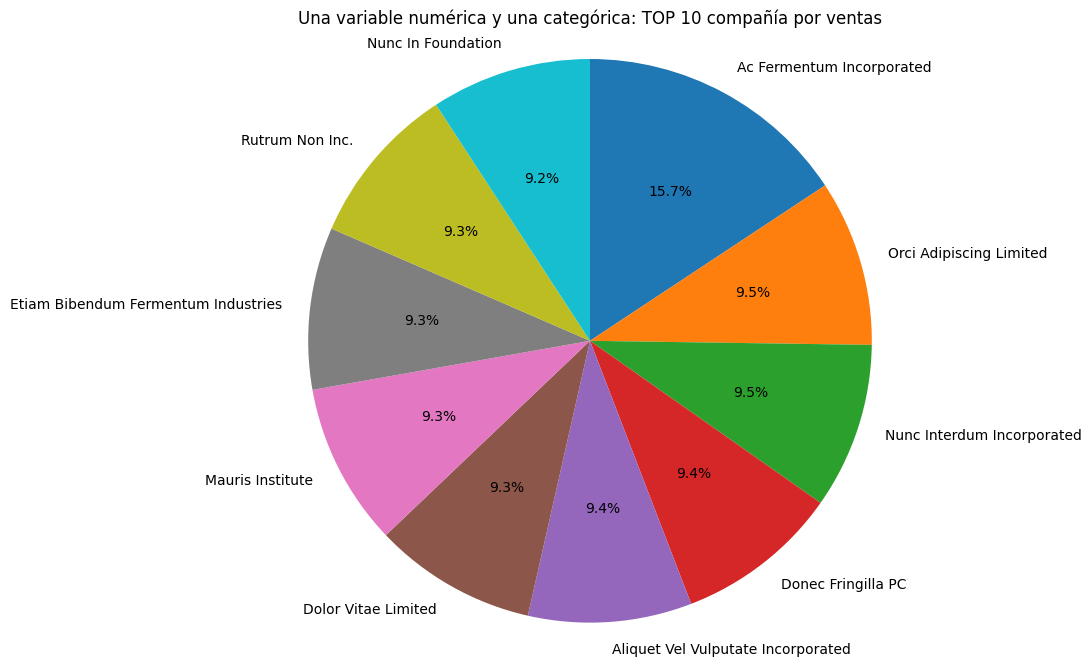

In [250]:
dfc=dfs["companies"]
dft=dfs["transactions"]

df3=pd.merge(dfc,dft, left_on="company_id", right_on="business_id", how="right")

df3 = df3[["company_name", "amount"]]

df_total = df3.groupby("company_name", as_index=False)["amount"].sum()

df_total=df_total.sort_values(by="amount", ascending=False)

top10=df_total.head(10)

plt.figure(figsize=(8,8))
plt.pie(top10["amount"], labels=top10['company_name'], autopct='%1.1f%%', startangle=90,counterclock=False)
plt.title("Una variable numérica y una categórica: TOP 10 compañía por ventas")
plt.axis("equal") 
plt.show()

En éste gráfico mostramos el Top 10 de empresas por volumen de ventras dónde destaca la empresa Ac Fermentum Incorporated que supera al resto por un 5% aproximadamente, mientras que el resto de las empresas muestran valores muy similares.

Dues variables categòriques.

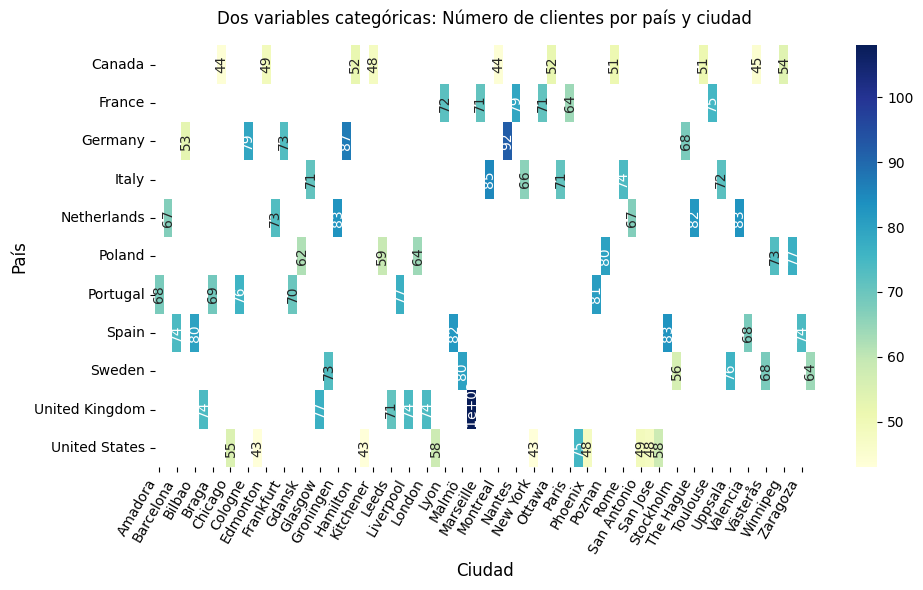

In [257]:
import seaborn as sns

df4=dfs["clientes"][["country","city"]]

df4_count = df4.groupby(["country","city"], as_index=False).size().rename(columns={"size":"clientes"})

df4_count = df4_count.sort_values(by=["country","clientes"], ascending=[True, False])

pivot_df = df4_count.pivot(index="country", columns="city", values="clientes")

plt.figure(figsize=(10,6))
ax= sns.heatmap(pivot_df,cmap="YlGnBu", annot=True)

for text in ax.texts:
    text.set_rotation(90)  
    text.set_ha('center')  
    text.set_va('center')

plt.title("Dos variables categóricas: Número de clientes por país y ciudad", fontsize=12, pad=15)
plt.xlabel("Ciudad", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.xticks(rotation=60, ha="right")
plt.tight_layout()
plt.show()

El gráfico muestra la cantidad de clientes por país y ciudad y observamos que Canadá a pesar de ser el país con menór número de clientes por ciudad es el país dónde se encuentran el mayor número de ciudades con clientes.

Tres variables combinades

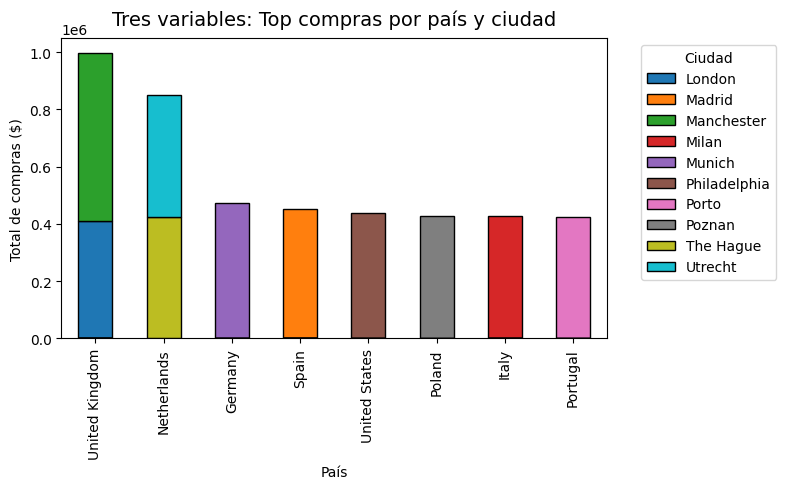

In [13]:
dfs["clientes"]
dfs["transactions"]

dfcx=dfs["clientes"][["id","country","city"]]

dfcxt=dfs["transactions"][["amount","user_id"]]

df5=pd.merge(dfcx,dfcxt,left_on="id",right_on="user_id",how="right")

df5=df5.groupby(["country","city"], as_index=False)["amount"].sum()

df5 = df5.rename(columns={"amount": "compras"})

df5_top10 = df5.sort_values(by="compras", ascending=False)

df5_top10=df5_top10.head(10)

pivot_df = df5_top10.pivot(index="country", columns="city", values="compras")

pivot_df["Total_Pais"] = pivot_df.sum(axis=1)
pivot_df = pivot_df.sort_values(by="Total_Pais", ascending=False)
pivot_df = pivot_df.drop(columns="Total_Pais")

ax = pivot_df.plot(kind="bar", stacked=True, figsize=(8, 5), edgecolor="black")
plt.title("Tres variables: Top compras por país y ciudad", fontsize=14, pad=10)
plt.xlabel("País")
plt.ylabel("Total de compras ($)")
plt.legend(title="Ciudad", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

En éste gráfico obresevamos el Top 10 de compras por ciudad y país en dónde Inglaterra si que presenta una diferencia significativa con el resto de países en dónde la mayoría de compras se concentran en una ciudad, mientras que en Inglaterra y Países Bajos se reparte en dos y con un mayor número de compras realizadas.

In [ ]:
Crea un Pairplot.

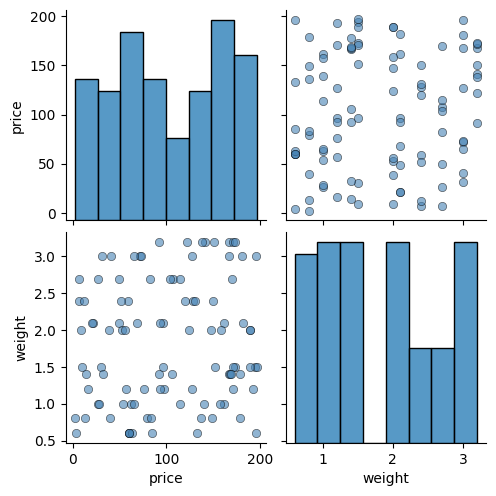

In [21]:
import seaborn as sns

dfp=dfs["products"][["price","weight"]].copy()

dfp["price"] = dfp["price"].replace("[$]", "", regex=True)
dfp["price"]= pd.to_numeric(dfp["price"])

sns.pairplot(dfp, plot_kws={'alpha':0.6, 'color':'steelblue', 'edgecolor':'black'})

plt.show()

En éste gráfico buscamos una relación entre el peso del producto y su precio y como observamos no hay una relación significativa entre estas variables. Y encontramos que no hay muchos productos que tengan un peso entre 1.8 y dos. 

Nivell 2
1. Representa la correlació d'algunes variables i interpreta els resultats segons les teves dades.

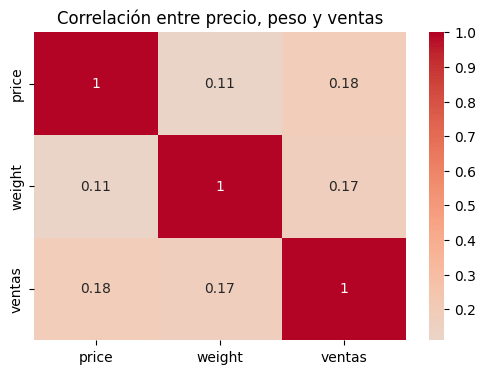

In [28]:
import scipy

dfp1=dfs["products"][["id","price","weight"]]
dftp1=dfs["transitionproduct"][["product_id"]]

df6=pd.merge(dfp1,dftp1,left_on="id",right_on="product_id", how="right")

df6=df6.groupby(["id","price","weight"], as_index=False)["product_id"].count()

df6 = df6.rename(columns={"product_id": "ventas"})

df6["price"] = df6["price"].replace("[$]", "", regex=True).astype(float)

corr = df6.corr(method="spearman", numeric_only=True)


plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlación entre precio, peso y ventas")
plt.show()

En éste gráfico observamos que no hay una correlación significativa entre las variables ya que todas son muy cercanas al cero. En éste caso hemos utilizado una correlación de Spearman ya que los valores no se distribuyen de una manera normal.

2. Implementa un Jointplot per explorar la relació entre dues variables i interpreta els resultats segons les teves dades.

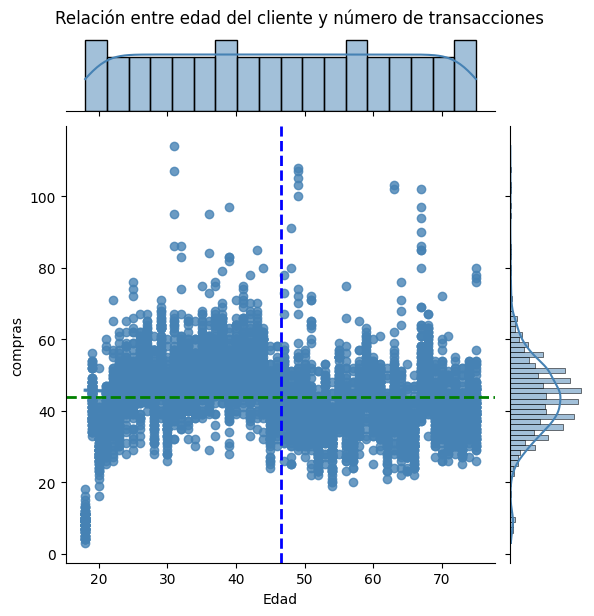

In [69]:
from datetime import datetime, date

dftp2=dfs["transitionproduct"][["id","product_id"]].rename(columns={"id": "transition_id"})
dfp2=dfs["products"][["id","price"]].rename(columns={"id": "product_id"})
dfcx2=dfs["clientes"][["id","birthday"]].rename(columns={"id": "user_id"}).copy()
dft1=dfs["transactions"][["id","user_id"]].rename(columns={"id": "transaction_id"})

df6=pd.merge(dftp2, dfp2, on="product_id", how="left")

df6 = pd.merge(df6, dft1, left_on="transition_id", right_on="transaction_id", how="inner")

dfcx2["birthday"] = dfcx2["birthday"].astype(str)
dfcx2["birthday"] = pd.to_datetime(dfcx2["birthday"], format="%b %d, %Y")


def edad(fnacimiento):
    hoy = date.today()
    return hoy.year - fnacimiento.year - (
        (hoy.month, hoy.day) < (fnacimiento.month, fnacimiento.day)
    )

dfcx2["Edad"] = dfcx2["birthday"].apply(lambda x: edad(x.date()))

df6 = pd.merge(df6, dfcx2[["user_id", "Edad"]], on="user_id", how="left")

df6 = df6.groupby(["product_id", "Edad","price"], as_index=False).size()

df6 = df6.rename(columns={"size": "compras"})


media_edad = df6["Edad"].mean()
media_trans = df6["compras"].mean()

g=sns.jointplot(
    data=df6,
    x="Edad",
    y="compras",
    kind="reg",  
    color="steelblue"
)

g.ax_joint.axvline(media_edad, color="blue", linestyle="--", linewidth=2)
g.ax_joint.axhline(media_trans, color="green", linestyle="--", linewidth=2)


plt.suptitle("Relación entre edad del cliente y número de transacciones", y=1.02)
plt.show()

plt.show()



En este gráfico podemos observar que no hay una relación muy estrecha entre la edad y el número de transacciones y observamos que el mayor número de transascciones lo realiza el grupo de edad comprendido entre 25 y 45 años mientras que vemos una  ligera disminución en el volúmen de transacciones a partir de los 50 años.